In [4]:
import sqlite3 as sql
import pandas as pd
import seaborn as sb

In [5]:
database="try.db"
con = sql.connect(database)
def Q(sql):
    res=pd.read_sql_query(sql,con,chunksize=10000)
    return next(res)

In [6]:
res = Q("SELECT  * FROM  patientFile")
res

,ID,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,false,true,59,176,8200151867,Sarena Waliszek,05/01/2018,true,true,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,false,true,77,186,None,Farris Robinet,12/07/2017,true,true,None
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,true,true,90,177,6145594128,Kaspar Spitaro,10/05/2018,false,false,None
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,true,true,70,150,None,Rafferty Fowls,10/21/2018,false,true,None
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,false,true,82,140,0480475776,Glenna MacNeachtain,11/15/2018,false,false,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Germain Ninnotti,gninnottirn@deliciousdays.com,131-633-7402,Female,11/11/2018,false,true,70,166,1723915459,None,01/12/2018,true,false,None
995,997,Tara Plewright,tplewrightro@wikispaces.com,628-914-7040,Female,10/29/2018,false,true,52,154,8992300603,Flossy Canlin,12/12/2017,true,true,None
996,998,Selig Creyke,screykerp@cnbc.com,507-286-3685,Male,1/11/2018,true,true,91,182,1825653321,Humfried Cartmel,5/17/2018,true,true,None
997,999,Manny Trenaman,mtrenamanrq@sphinn.com,921-567-6180,Male,5/20/2018,false,true,63,157,3705748912,Farris Robinet,12/15/2017,true,true,S6610


In [7]:
res=Q("SELECT  DISTINCT (doctor_name) ,patient_gender, count(*) as countValue from patientFile WHERE doctor_name is not NULL  group by 1,2 order by doctor_name")
res

,doctor_name,patient_gender,countValue
0,Carly SperaJillie Katt,Female,28
1,Carly SperaJillie Katt,Male,19
2,Cissy Markey,Female,30
3,Cissy Markey,Male,27
4,Dulce McKerley,Female,21
5,Dulce McKerley,Male,21
6,Farris Robinet,Female,31
7,Farris Robinet,Male,24
8,Flossy Canlin,Female,24
9,Flossy Canlin,Male,31


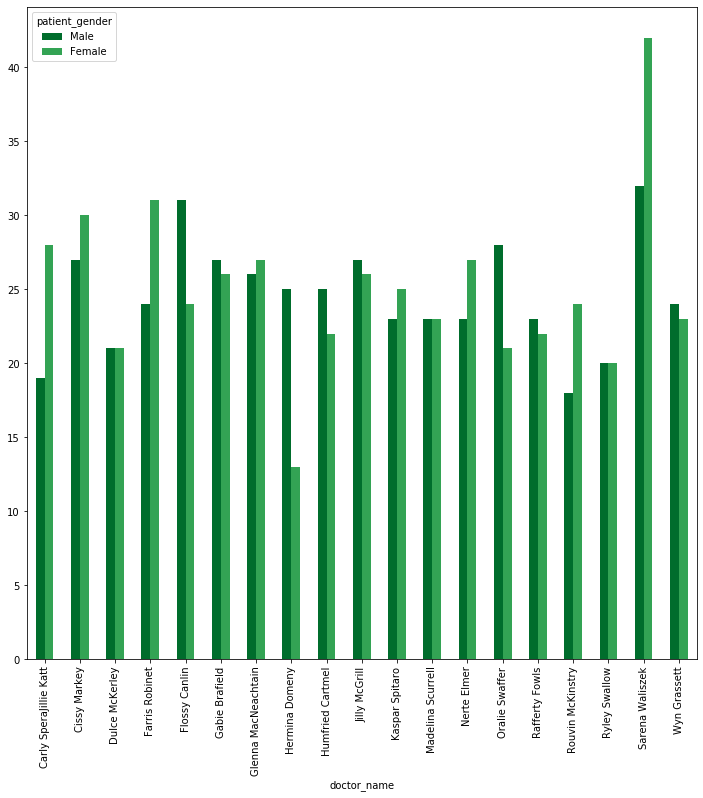

In [8]:
pivot_df=res.pivot(index='doctor_name',columns='patient_gender',values='countValue')
pivot_df.loc[:,['Male','Female']].plot.bar( color=["#006D2C","#33A354"], figsize=(12,12))
   


In [9]:
res=Q("SELECT  DISTINCT patient_gender,patient_diabetic, count(*) as countValue from patientFile GROUP by 1,2")
res

,patient_gender,patient_diabetic,countValue
0,Female,false,261
1,Female,true,242
2,Male,false,223
3,Male,true,273


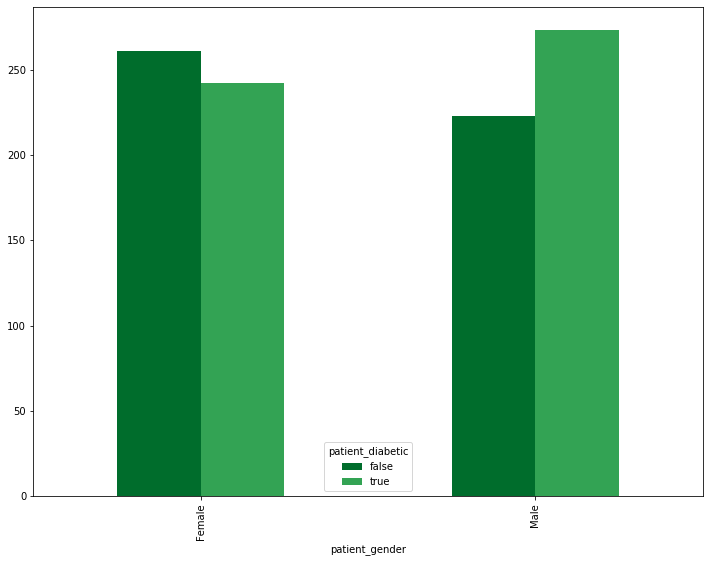

In [10]:
pivot_df=res.pivot(index='patient_gender',columns='patient_diabetic',values='countValue')
pivot_df.loc[:,['false','true']].plot.bar( color=["#006D2C","#33A354"], figsize=(12,9))
   


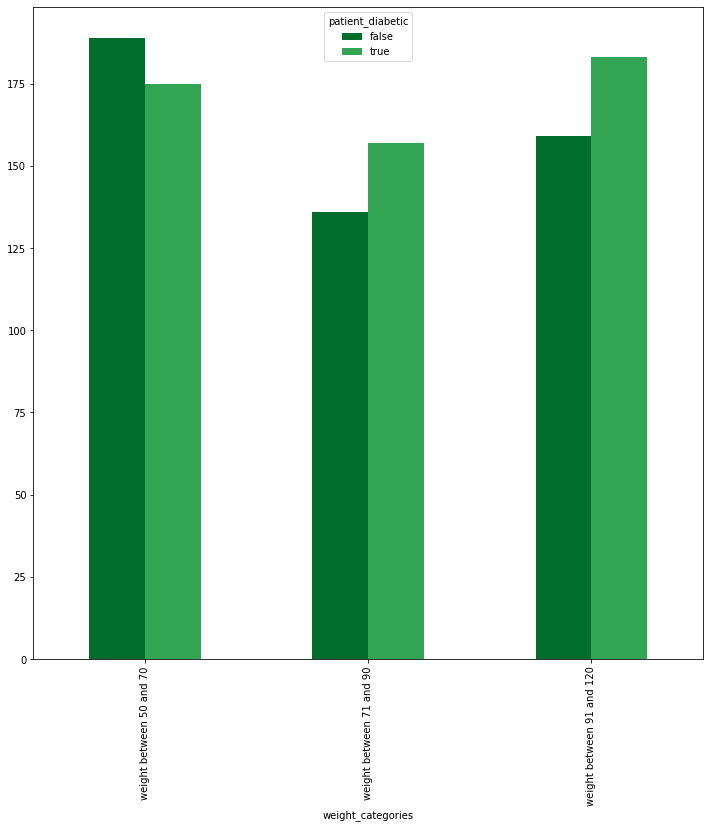

In [11]:
res=Q("select weight_categories, patient_diabetic, count(*) as countValue FROM (SELECT  patient_diabetic,patient_weight_kg, CASE WHEN patient_weight_kg >= 50 AND patient_weight_kg <= 70 then 'weight between 50 and 70' WHEN patient_weight_kg >= 71 AND patient_weight_kg <= 90 then 'weight between 71 and 90' WHEN patient_weight_kg >= 91 AND patient_weight_kg <= 120 then 'weight between 91 and 120' end as weight_categories from patientFile) t1 GROUP by 2,1 order by 1")
pivot_df=res.pivot(index='weight_categories',columns='patient_diabetic',values='countValue')
pivot_df.loc[:,['false','true']].plot.bar( color=["#006D2C","#33A354"], figsize=(12,12))


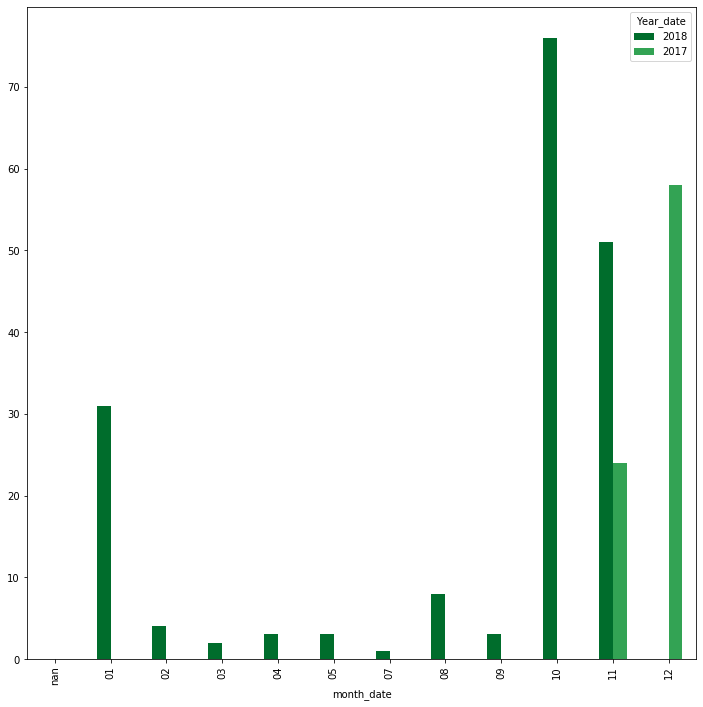

In [16]:
res=Q("SELECT strftime('%m', date(substr(appointment_date,7,4)||'-'||substr(appointment_date,1,2)||'-'||substr(appointment_date,4,2))) as month_date, strftime('%Y', date(substr(appointment_date,7,4)||'-'||substr(appointment_date,1,2)||'-'||substr(appointment_date,4,2))) as Year_date, count(*) as countValue from patientFile group by 1,2")
pivot_df=res.pivot(index='month_date',columns='Year_date',values='countValue')
pivot_df.loc[:,['2018','2017']].plot.bar( color=["#006D2C","#33A354"], figsize=(12,12))
